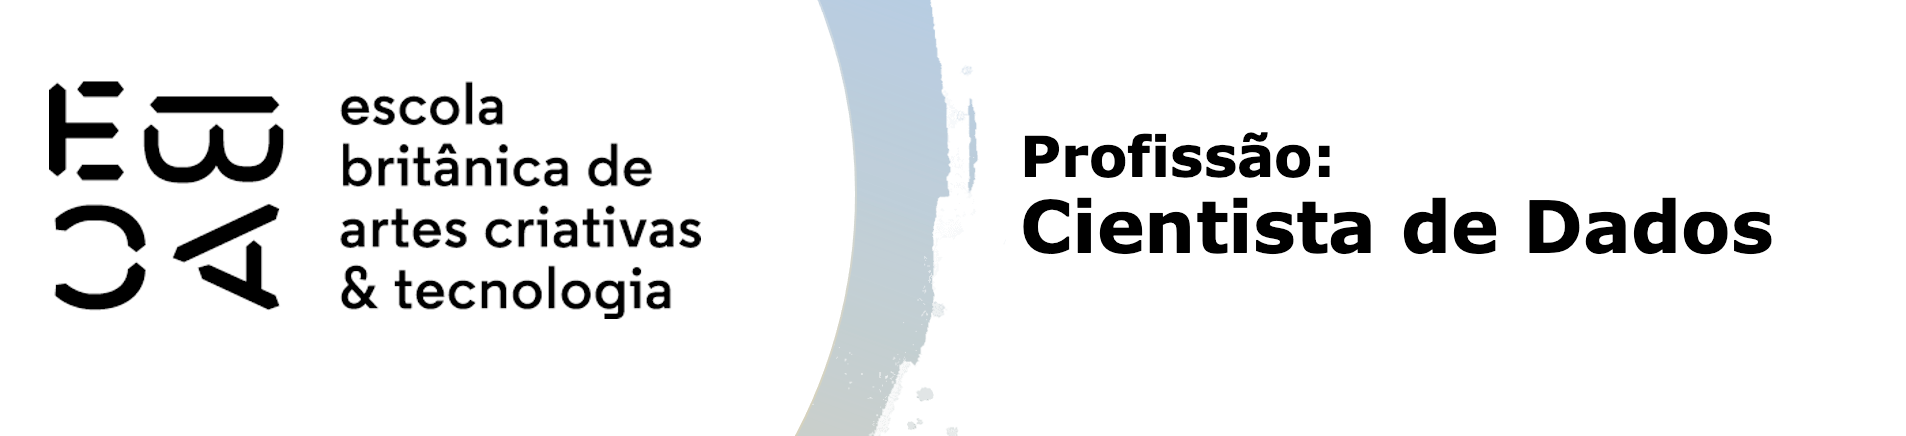

# Regressão III - Tarefa

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.interpolate import interp1d 

In [2]:
df = pd.read_csv('previsao_de_renda_II.csv', index_col=0)
df.head()

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


## Avalie valores missing e substitua pela média

Neste exercício não vamos nos preocupar com valores *missing*. Substitua-os pela média.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 2015-01-01 to 2016-03-01
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  750000 non-null  int64  
 1   sexo                   750000 non-null  object 
 2   posse_de_veiculo       750000 non-null  object 
 3   posse_de_imovel        750000 non-null  object 
 4   qtd_filhos             750000 non-null  int64  
 5   tipo_renda             750000 non-null  object 
 6   educacao               750000 non-null  object 
 7   estado_civil           750000 non-null  object 
 8   tipo_residencia        750000 non-null  object 
 9   idade                  750000 non-null  int64  
 10  tempo_emprego          624240 non-null  float64
 11  qt_pessoas_residencia  750000 non-null  float64
 12  renda                  750000 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 80.1+ MB


Observando os valores de dados non-null apresentados anteriormente percebemos que apenas "tempo_emprego" possui valores nulos, que podemos substituir pela média de valores dessa variável.

In [4]:
df['tempo_emprego'] = df['tempo_emprego'].fillna(df['tempo_emprego'].mean())

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 2015-01-01 to 2016-03-01
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  750000 non-null  int64  
 1   sexo                   750000 non-null  object 
 2   posse_de_veiculo       750000 non-null  object 
 3   posse_de_imovel        750000 non-null  object 
 4   qtd_filhos             750000 non-null  int64  
 5   tipo_renda             750000 non-null  object 
 6   educacao               750000 non-null  object 
 7   estado_civil           750000 non-null  object 
 8   tipo_residencia        750000 non-null  object 
 9   idade                  750000 non-null  int64  
 10  tempo_emprego          750000 non-null  float64
 11  qt_pessoas_residencia  750000 non-null  float64
 12  renda                  750000 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 80.1+ MB


A fórmula resultou na substituição dos valores nulos, observando que em "tempo_emprego" agora há 750000 valores não nulos.

### Base de testes

Separe os três últimos meses como base *holdout* (base de teste).

In [6]:
data_max = df.index.max()
data_max

'2016-03-01'

Se a data máxima encontrada é 01/03/2016, então a base de teste incluirá os dados de Janeiro/2016, Fevereiro/2016 e Março/2016. Que será calculado:

In [7]:
holdout = df[pd.to_datetime(df.index) > pd.to_datetime(df.index.max()) - pd.DateOffset(months=3)]
holdout.index.unique()

Index(['2016-01-01', '2016-02-01', '2016-03-01'], dtype='object', name='data_ref')

In [8]:
# Base de treino
train = df[pd.to_datetime(df.index) <= pd.to_datetime(df.index.max()) - pd.DateOffset(months=3)]
train.index.unique()

Index(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01', '2015-05-01',
       '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
       '2015-11-01', '2015-12-01'],
      dtype='object', name='data_ref')

### Primeiro modelo
 Não use *index* e não use a data. Avalie o modelo com o $R^2-ajustado$

In [9]:
# Removendo as colunas do index
holdout = holdout.reset_index(drop=True)
holdout = holdout.drop(['index'], axis = 1)

train = train.reset_index(drop=True)
train = train.drop(['index'], axis = 1)

In [10]:
res = smf.ols('np.log(renda) ~ tempo_emprego', data=train).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                 4.298e+05
Date:                Sun, 08 Jun 2025   Prob (F-statistic):               0.00
Time:                        21:47:31   Log-Likelihood:            -8.0817e+05
No. Observations:              600000   AIC:                         1.616e+06
Df Residuals:                  599998   BIC:                         1.616e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2780      0.002   4262.716

In [11]:
print(f"O R² ajustado é {res.rsquared:.2%} para a base logarítima. Aplicando a fórmula de retorno para a base de renda o R² ajustado é igual a: ")

O R² ajustado é 41.74% para a base logarítima. Aplicando a fórmula de retorno para a base de renda o R² ajustado é igual a: 


### Análise de perfil

Categorize a variável ```tempo_emprego``` em 20 quantis (cada categoria deve ter aproximadamente a mesma quantidade de observações) e faça uma tabela de perfil (armazene como dataframe) para esta categorização:

- Cada linha é uma categoria
- Uma coluna para a quantidade de observações de cada categoria
- Uma coluna para a média do log-renda para cada categoria
- Uma coluna para a média do tempo de emprego para cada categoria

Faça um gráfico da média do tempo de emprego pela média do log-renda. Insira uma célula de texto e comente se te parece que alguma das transformações vistas no módulo deve fornecer bons resultados.

In [12]:
holdout['tempo_emprego_cat'], quebras = pd.qcut(holdout.tempo_emprego, 20, duplicates='drop', retbins=True)

rd_mean = pd.DataFrame()
rd_mean['renda'] = round(holdout.groupby('tempo_emprego_cat', observed=False)['renda'].mean(), 3)
rd_mean['obs'] = holdout.groupby('tempo_emprego_cat', observed=False)['renda'].count()
rd_mean['log_renda'] = round(np.log(rd_mean['renda']), 3) 
rd_mean['tempo_emprego'] = round(holdout.groupby('tempo_emprego_cat', observed=False)['tempo_emprego'].mean(), 3)
rd_mean['log_renda_min'] = round(np.log(rd_mean.renda - 2*holdout.groupby('tempo_emprego_cat')['renda'].sem()), 3)
rd_mean['log_renda_max'] = round(np.log(rd_mean.renda + 2*holdout.groupby('tempo_emprego_cat')['renda'].sem()), 3)

rd_mean

C:\Users\marin\AppData\Local\Temp\ipykernel_16596\1774223183.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rd_mean['log_renda_min'] = round(np.log(rd_mean.renda - 2*holdout.groupby('tempo_emprego_cat')['renda'].sem()), 3)
C:\Users\marin\AppData\Local\Temp\ipykernel_16596\1774223183.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rd_mean['log_renda_max'] = round(np.log(rd_mean.renda + 2*holdout.groupby('tempo_emprego_cat')['renda'].sem()), 3)


,renda,obs,log_renda,tempo_emprego,log_renda_min,log_renda_max
tempo_emprego_cat,,,,,,
"(0.11699999999999999, 0.827]",1756.075,7601,7.471,0.521,7.452,7.489
"(0.827, 1.468]",1932.434,7464,7.567,1.134,7.543,7.590
"(1.468, 2.099]",2166.637,7459,7.681,1.790,7.660,7.701
"(2.099, 2.912]",2372.940,7511,7.772,2.514,7.751,7.793
"(2.912, 3.636]",2630.422,7507,7.875,3.300,7.854,7.895
"(3.636, 4.304]",2907.845,7545,7.975,3.994,7.954,7.996
"(4.304, 4.945]",3113.127,7420,8.043,4.625,8.014,8.072
"(4.945, 5.759]",3398.776,7509,8.131,5.370,8.111,8.151
"(5.759, 6.622]",3754.314,7492,8.231,6.204,8.212,8.249


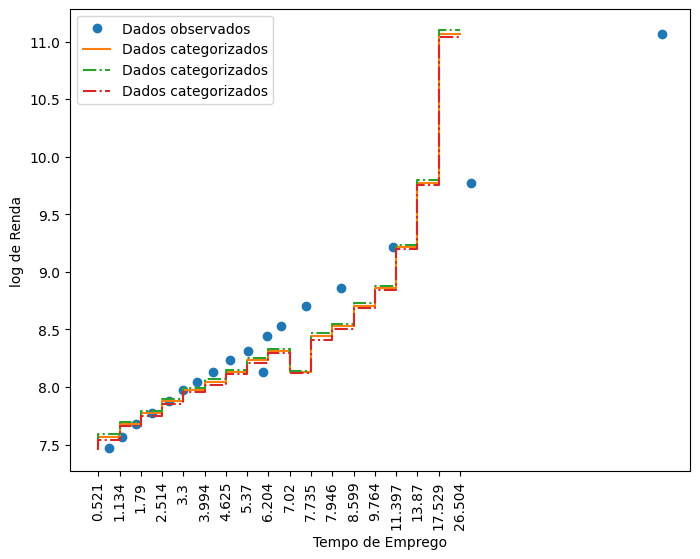

In [13]:
fig, ax = plt.subplots(figsize = (8, 6))

ax.plot(rd_mean.tempo_emprego, rd_mean.log_renda, "o", label="Dados observados", alpha=1)
ax.step(rd_mean.index.astype(str), rd_mean.log_renda, "-", label="Dados categorizados", alpha=1)
ax.step(rd_mean.index.astype(str), rd_mean.log_renda_max, "-.", label="Dados categorizados", alpha=1)
ax.step(rd_mean.index.astype(str), rd_mean.log_renda_min, "-.", label="Dados categorizados", alpha=1)

plt.ylabel("log de Renda")
plt.xlabel("Tempo de Emprego")
ax.set_xticks(rd_mean.index.astype(str), rd_mean.tempo_emprego, rotation=90)

ax.legend()

In [14]:
rd_mean = rd_mean.reset_index() 
rd_mean['tempo_emprego_cat'] = rd_mean['tempo_emprego_cat'].astype('category')

res_cat = smf.ols('log_renda ~ tempo_emprego_cat', data=rd_mean).fit()
print(f'R-quadrado paracategporização em 20 quantis: {res_cat.rsquared:.2%}')
print(res_cat.summary())

R-quadrado paracategporização em 20 quantis: 100.00%
                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 08 Jun 2025   Prob (F-statistic):                nan
Time:                        21:47:31   Log-Likelihood:                 570.87
No. Observations:                  18   AIC:                            -1106.
Df Residuals:                       0   BIC:                            -1090.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

C:\Users\marin\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\marin\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1796: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\marin\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1796: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\marin\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1718: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


In [15]:
rd_mean['tempo_emprego'].unique()

array([ 0.521,  1.134,  1.79 ,  2.514,  3.3  ,  3.994,  4.625,  5.37 ,
        6.204,  7.02 ,  7.735,  7.946,  8.599,  9.764, 11.397, 13.87 ,
       17.529, 26.504])

C:\Users\marin\AppData\Local\Temp\ipykernel_16596\171438031.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rd_mean_n['log_renda_min'] = round(np.log(rd_mean_n.renda - 2*holdout.groupby('tempo_emprego_cat')['renda'].sem()), 3)
C:\Users\marin\AppData\Local\Temp\ipykernel_16596\171438031.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rd_mean_n['log_renda_max'] = round(np.log(rd_mean_n.renda + 2*holdout.groupby('tempo_emprego_cat')['renda'].sem()), 3)


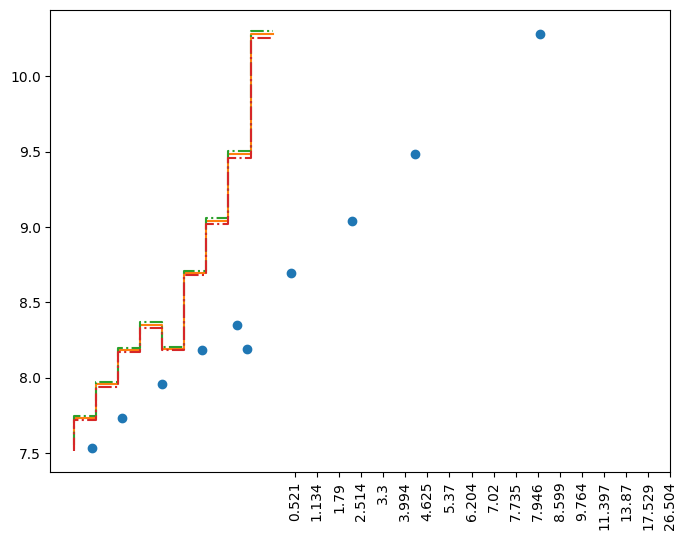

In [16]:
quebras = [0.521, 1.134, 3.3, 4.625, 7.02, 7.735, 8.599, 11.397, 13.87, 17.529, 26.504]
holdout['tempo_emprego_cat'] = pd.cut(holdout['tempo_emprego'], quebras)

rd_mean_n = pd.DataFrame()
rd_mean_n['renda'] = round(holdout.groupby('tempo_emprego_cat', observed=False)['renda'].mean(), 3)
rd_mean_n['tempo_emprego'] = round(holdout.groupby('tempo_emprego_cat', observed=False)['tempo_emprego'].mean(), 3)
rd_mean_n['log_renda'] = round(np.log(rd_mean_n['renda']), 3) 
rd_mean_n['log_renda_min'] = round(np.log(rd_mean_n.renda - 2*holdout.groupby('tempo_emprego_cat')['renda'].sem()), 3)
rd_mean_n['log_renda_max'] = round(np.log(rd_mean_n.renda + 2*holdout.groupby('tempo_emprego_cat')['renda'].sem()), 3)

rd_mean_n.rename(columns={'y':'rd_mean_n'}, inplace=True)

tab = holdout.merge(rd_mean_n, on='tempo_emprego_cat', how='left')

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(rd_mean_n.tempo_emprego, rd_mean_n.log_renda, "o", label="Dados observados", alpha=1)
ax.step(rd_mean_n.index.astype(str), rd_mean_n.log_renda, "-", label="Dados categorizados", alpha=1)
ax.step(rd_mean_n.index.astype(str), rd_mean_n.log_renda_max, "-.", label="Dados categorizados", alpha=1)
ax.step(rd_mean_n.index.astype(str), rd_mean_n.log_renda_min, "-.", label="Dados categorizados", alpha=1)

ax.set_xticks(rd_mean.index.astype(str), rd_mean.tempo_emprego, rotation=90)

In [17]:
rd_mean_n = rd_mean_n.reset_index() 
rd_mean_n['tempo_emprego_cat'] = rd_mean_n['tempo_emprego_cat'].astype('category')

res_cat_n = smf.ols('log_renda ~ tempo_emprego_cat', data=rd_mean_n).fit()
print(f'R-quadrado paracategporização em 11 quantis: {res_cat_n.rsquared:.2%}')
print(res_cat_n.summary())

R-quadrado paracategporização em 11 quantis: 100.00%
                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 08 Jun 2025   Prob (F-statistic):                nan
Time:                        21:47:31   Log-Likelihood:                 322.44
No. Observations:                  10   AIC:                            -624.9
Df Residuals:                       0   BIC:                            -621.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

C:\Users\marin\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\marin\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1796: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\marin\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1796: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\marin\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1718: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


### Linearização

Experimente pelo menos duas técnicas de linearização vistas ao longo do módulo para melhorar o ajuste da variável ```tempo_emprego```. Compare o $R^2-ajustado$ e avalie se alguma delas apresentou resultados relevantes com relação ao primeiro modelo.


In [18]:
# Observando a curva gerada no gráfico anterior farei a linerização utilizando os métodos:  Transformações convencionais em X, Regressão segmentada e Lowess

print("1. Transformações convencionais em X:")
# a curva parece representar uma função do tipo y = -ax² + bx + c
res_tr_1 = smf.ols('np.log(renda) ~ (tempo_emprego)**2 ',data=train).fit()

print(f'R-quadrado para tempo de emprego ao quadrado: {res_tr_1.rsquared:.2%}')

1. Transformações convencionais em X:
R-quadrado para tempo de emprego ao quadrado: 41.74%


In [19]:
# a curva parece representar uma função do tipo y = -ax² + bx + c
res_tr_2 = smf.ols('np.log(renda) ~ tempo_emprego + (tempo_emprego)**2',data=train).fit()

print(f'R-quadrado para a funçao de 2º grau de tempo de emprego: {res_tr_2.rsquared:.2%}')

R-quadrado para a funçao de 2º grau de tempo de emprego: 41.74%


In [20]:
# a curva parece representar uma função do tipo y = -ax² + bx + c
res_tr_3 = smf.ols('np.log(renda) ~ np.log(tempo_emprego)',data=train).fit()

print(f'R-quadrado para o logarítimo de tempo de emprego: {res_tr_3.rsquared:.2%}')

R-quadrado para o logarítimo de tempo de emprego: 28.10%


In [21]:
# a curva parece representar uma função do tipo y = -ax² + bx + c
res_tr_4 = smf.ols('np.log(renda) ~ I(np.log(tempo_emprego)**2)',data=train).fit()

print(f'R-quadrado para logaritmo de tempo de emprego ao quadrado: {res_tr_4.rsquared:.2%}')

R-quadrado para logaritmo de tempo de emprego ao quadrado: 39.23%


In [22]:
# a curva parece representar uma função do tipo y = -ax² + bx + c
res_tr_5 = smf.ols('np.log(renda) ~ np.sqrt(tempo_emprego+1)',data=train).fit()

print(f'R-quadrado para a raíz quadrada de tempo de emprego: {res_tr_5.rsquared:.2%}')

R-quadrado para a raíz quadrada de tempo de emprego: 39.11%


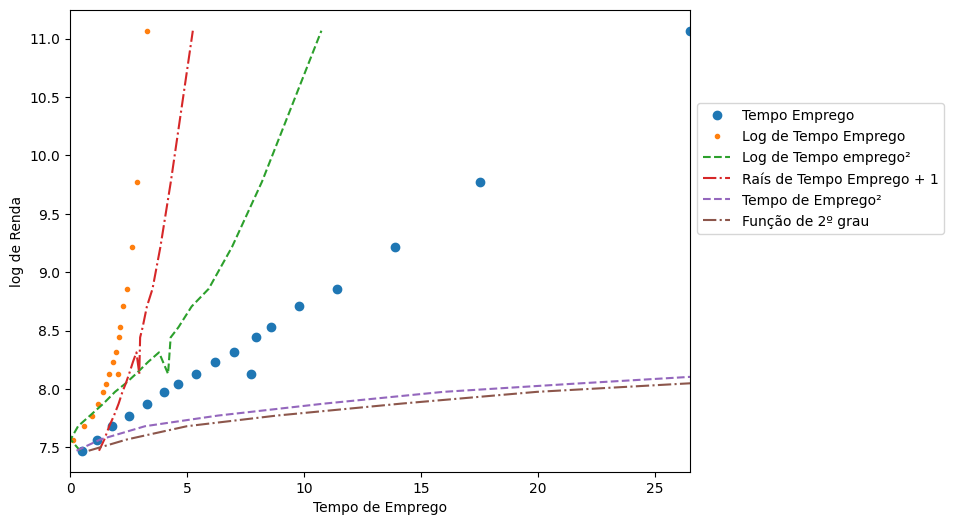

In [23]:
fig, ax = plt.subplots(figsize = (8, 6))

ax.plot(rd_mean.tempo_emprego, rd_mean.log_renda, "o", label="Tempo Emprego", alpha=1)
ax.plot(np.log(rd_mean.tempo_emprego), rd_mean.log_renda, ".", label="Log de Tempo Emprego", alpha=1)
ax.plot(np.log(rd_mean.tempo_emprego)**2, rd_mean.log_renda, "--", label="Log de Tempo emprego²", alpha=1)
ax.plot(np.sqrt(rd_mean.tempo_emprego+1), rd_mean.log_renda, "-.", label="Raís de Tempo Emprego + 1", alpha=1)
ax.plot((rd_mean.tempo_emprego)**2, rd_mean.log_renda, "--", label="Tempo de Emprego²", alpha=1)
ax.plot(rd_mean.tempo_emprego + (rd_mean.tempo_emprego)**2, rd_mean.log_renda, "-.", label="Função de 2º grau", alpha=1)

plt.ylabel("log de Renda")
plt.xlabel("Tempo de Emprego")
plt.xlim(0, max(rd_mean.tempo_emprego))

ax.legend(bbox_to_anchor=(1, 0.5))

As transformadas analisadas não aumentarma o valo de R², portanto não houve melhora do modelo.

In [24]:
print("2. Regressão segmentadas:")
print("Observando o gráfico anterior podemos notar alguns cotovelos de valores aproximados")
C1 = 7.02
C2 = 7.735
C3 = 11.397
C4 = 13.87
C5 = 17.529

tr_copy = train.copy()
tr_copy['log_renda'] = np.log(tr_copy['renda'])

# Variáveis segmentadas
tr_copy['X1_1'] = (tr_copy.tempo_emprego <= C1)*tr_copy.tempo_emprego + (tr_copy.tempo_emprego > C1)*C1
tr_copy['X1_2'] = (tr_copy.tempo_emprego <= C1)*0 + ((tr_copy.tempo_emprego > C1) & (tr_copy.tempo_emprego <= C2))*(tr_copy.tempo_emprego - C1) + (tr_copy.tempo_emprego > C2)*(C2 - C1)
tr_copy['X1_3'] = (tr_copy.tempo_emprego <= C2)*0 + ((tr_copy.tempo_emprego > C2) & (tr_copy.tempo_emprego <= C3))*(tr_copy.tempo_emprego - C2) + (tr_copy.tempo_emprego > C3)*(C3 - C2)
tr_copy['X1_4'] = (tr_copy.tempo_emprego <= C3)*0 + ((tr_copy.tempo_emprego > C3) & (tr_copy.tempo_emprego <= C4))*(tr_copy.tempo_emprego - C3) + (tr_copy.tempo_emprego > C4)*(C4 - C3)
tr_copy['X1_5'] = (tr_copy.tempo_emprego <= C4)*0 + (tr_copy.tempo_emprego > C4)*(tr_copy.tempo_emprego - C4)

res_seg = smf.ols('log_renda ~ X1_1 + X1_2 + X1_3 + X1_4 + X1_5', data=tr_copy).fit()

print(f'R-quadrado: {res_seg.rsquared:.2%}')

res_seg.summary()

2. Regressão segmentadas:
Observando o gráfico anterior podemos notar alguns cotovelos de valores aproximados
R-quadrado: 42.34%


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                 8.813e+04
Date:                Sun, 08 Jun 2025   Prob (F-statistic):               0.00
Time:                        21:47:32   Log-Likelihood:            -8.0504e+05
No. Observations:              600000   AIC:                         1.610e+06
Df Residuals:                  599994   BIC:                         1.610e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.3010      0.003   2404.991      0.000       8.294       8.308
X1_1           0.1363      0.001    161.467      0.000       0.135       0.138
X1_2          -0.2104      0.006    -35.027      0.000      -0.222      -0.199
X1_3           0.2109      0.002    122.715      0.000       0.207       0.214
X1_4           0.1239      0.003     41.573      0.000       0.118       0.130
X1_5           0.1204      0.001    227.518      0.000       0.119       0.121
==============================================================================
Omnibus:                      889.164   Durbin-Watson:                   1.256
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.510
Skew:                          -0.045   Prob(JB):                    1.63e-171
Kurtosis:                       2.847   Cond. No.                         32.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Comparando-se os valores de R² ajustado anteriormente encontrado e o atual percebemos que houve um pequeno aumento do valor.

3. Lowees:


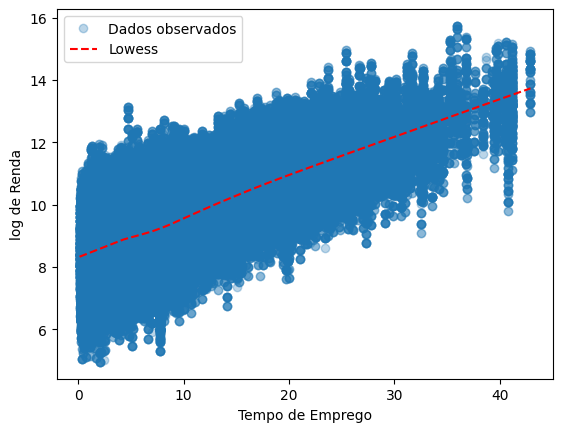

In [25]:
print("3. Lowees:")
# Suavização dos dados na variável lowess
lowess = sm.nonparametric.lowess(np.log(train.renda), train.tempo_emprego, frac=2/3)

# Y suavizado
lowess_y = lowess[:, 1]

# x suavizado
lowess_x = lowess[:, 0]

# Gráfico
fig, ax = plt.subplots()
ax.plot(train['tempo_emprego'], np.log(train['renda']), 'o', alpha=0.3, label='Dados observados')
ax.plot(lowess_x, lowess_y, 'r--', label='Lowess')

# Estética
ax.set_xlabel('Tempo de Emprego')
ax.set_ylabel('log de Renda')
ax.legend()
plt.show()

In [26]:
# Interpolação do scipy
f = interp1d(lowess_x, lowess_y, bounds_error=False)

train['tempo_emprego_lowess'] = f(train.tempo_emprego)
train.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,tempo_emprego_lowess
0,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14,10.526933
1,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81,9.495954
2,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66,9.290507
3,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84,8.484386
4,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78,8.478176


In [27]:
res_low = smf.ols('np.log(renda) ~ tempo_emprego_lowess',data=train).fit()
print(f'R-quadrado: {res_low.rsquared:.2%}')

res_low.summary()

R-quadrado: 42.05%


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 4.354e+05
Date:                Sun, 08 Jun 2025   Prob (F-statistic):               0.00
Time:                        21:49:35   Log-Likelihood:            -8.0656e+05
No. Observations:              600000   AIC:                         1.613e+06
Df Residuals:                  599998   BIC:                         1.613e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0169      0.014      1.197      0.231      -0.011       0.044
tempo_emprego_lowess     0.9971      0.002    659.838      0.000       0.994       1.000
==============================================================================
Omnibus:                      868.551   Durbin-Watson:                   1.261
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              774.847
Skew:                          -0.047   Prob(JB):                    5.55e-169
Kurtosis:                       2.851   Cond. No.                         111.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Comparando-se os valor de R² pelo ajuste de cotovelos e o de lowess houve uma redução menor do que 0,3 na porcentagem encontrada, apesar de uma redução tão pequeno o primeiro ajuste é mais adequado.

### Avaliando o modelo

Avalie os resultados dos modelos construidos na base de testes.

Se segue a ordem crescente os valores de R² ajustado:

In [28]:
col_res_named = [
    ("res", res),
    ("res_cat", res_cat),
    ("res_cat_n", res_cat_n),
    ("res_tr_1", res_tr_1),
    ("res_tr_2", res_tr_2),
    ("res_tr_3", res_tr_3),
    ("res_tr_4", res_tr_4),
    ("res_tr_5", res_tr_5),
    ("res_seg", res_seg),
    ("res_low", res_low),
]

col_res_sorted = sorted(
    col_res_named,
    key=lambda x: x[1].rsquared_adj if not np.isnan(x[1].rsquared_adj) else -np.inf,
    reverse=True
)

for i, (nome, modelo) in enumerate(col_res_sorted, start=1):
    print(f'{i}. {nome:<10} | R²: {modelo.rsquared:.4f} | Ajustado: {modelo.rsquared_adj:.4f}')

1. res_seg    | R²: 0.4234 | Ajustado: 0.4234
2. res_low    | R²: 0.4205 | Ajustado: 0.4205
3. res        | R²: 0.4174 | Ajustado: 0.4174
4. res_tr_1   | R²: 0.4174 | Ajustado: 0.4174
5. res_tr_2   | R²: 0.4174 | Ajustado: 0.4174
6. res_tr_4   | R²: 0.3923 | Ajustado: 0.3923
7. res_tr_5   | R²: 0.3911 | Ajustado: 0.3911
8. res_tr_3   | R²: 0.2810 | Ajustado: 0.2810
9. res_cat    | R²: 1.0000 | Ajustado: nan
10. res_cat_n  | R²: 1.0000 | Ajustado: nan


assim podemos perceber que a melhor modelagem apresentada no exercício executado é a regressão segmentada. No resultado não desconsideramos os valores categorizados uma vez que ele parece estar em overfeat. 